In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\pauli\Downloads\Video_Games_Sales_as_at_22_Dec_2016.csv")
print(df.head(5))
df = df.copy()

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
df = df.astype({
    'Year_of_Release': 'Int64',
    'Critic_Count': 'Int64',
    'User_Count': 'Int64'})

In [4]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors="coerce")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  Int64  
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   Int64  
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   Int64  
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: Int64(3), float64(7), object(6)
memory usage: 2.1+ MB


In [6]:
df['Platform'].value_counts()

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [7]:
df['Genre'].value_counts()

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [8]:
df['Year_of_Release'].value_counts()

Year_of_Release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: Int64

In [9]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [10]:
nulls = df.loc[df['Name'].isnull() | df['Year_of_Release'].isnull()]

In [11]:
nulls

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,<NA>,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29,8.5,140,EA Tiburon,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20,6.4,76,EA Canada,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17,7.9,22,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,<NA>,NaN,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,<NA>,NaN,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,<NA>,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7,NaN,<NA>,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,<NA>,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14,6.5,6,Midway,T
16452,Inversion,PC,<NA>,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6,6.7,107,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,NaN,<NA>,NaN,<NA>,NaN,NaN


shows = df.dropna(subset=['director', 'country', 'cast'])
shows.isnull().sum()

In [12]:
df = df.dropna(subset=['Name', 'Year_of_Release', 'Publisher'])

In [13]:
#because file name is sales as of 22-Dec_2016, anything released in 2017 and 2020 should not be taken into account
df = df[df['Year_of_Release'] <= 2016]

In [14]:
df['Year_of_Release'].value_counts()

Year_of_Release
2008    1427
2009    1426
2010    1253
2007    1196
2011    1133
2006    1006
2005     934
2002     829
2003     775
2004     743
2012     653
2015     606
2014     581
2013     544
2016     500
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: Int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16412 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16412 non-null  object 
 1   Platform         16412 non-null  object 
 2   Year_of_Release  16412 non-null  Int64  
 3   Genre            16412 non-null  object 
 4   Publisher        16412 non-null  object 
 5   NA_Sales         16412 non-null  float64
 6   EU_Sales         16412 non-null  float64
 7   JP_Sales         16412 non-null  float64
 8   Other_Sales      16412 non-null  float64
 9   Global_Sales     16412 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   Int64  
 12  User_Score       7461 non-null   float64
 13  User_Count       7461 non-null   Int64  
 14  Developer        9903 non-null   object 
 15  Rating           9766 non-null   object 
dtypes: Int64(3), float64(7), object(6)
memory usage: 2.2+ MB


In [16]:
duplicates = df[df.duplicated(subset=["Name", "Platform", "Year_of_Release"], keep=False)]
print(duplicates)

                Name Platform  Year_of_Release   Genre        Publisher  \
604    Madden NFL 13      PS3             2012  Sports  Electronic Arts   
16233  Madden NFL 13      PS3             2012  Sports  Electronic Arts   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
604        2.11      0.22       0.0         0.23          2.56          83.0   
16233      0.00      0.01       0.0         0.00          0.01          83.0   

       Critic_Count  User_Score  User_Count   Developer Rating  
604              22         5.5         101  EA Tiburon      E  
16233            22         5.5         101  EA Tiburon      E  


In [17]:
df = df.drop_duplicates(subset=["Name", "Platform", "Year_of_Release"])

In [18]:
duplicates = df[df.duplicated(subset=["Name", "Platform", "Year_of_Release"], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating]
Index: []


In [19]:
df['Decade'] = df['Year_of_Release'] - (df['Year_of_Release'] % 10)

In [20]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Decade
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E,2000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,<NA>,NaN,<NA>,NaN,NaN,1980
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E,2000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E,2000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,<NA>,NaN,<NA>,NaN,NaN,1990


In [21]:
df2 = df.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False).nlargest(10)

In [22]:
print(df2)

Name
Wii Sports                        82.53
Grand Theft Auto V                56.57
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.59
New Super Mario Bros.             29.80
Call of Duty: Black Ops II        29.40
Name: Global_Sales, dtype: float64


C:\Users\pauli\AppData\Local\Temp\ipykernel_21708\1378445060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df2.values, y=df2.index, palette = "crest")


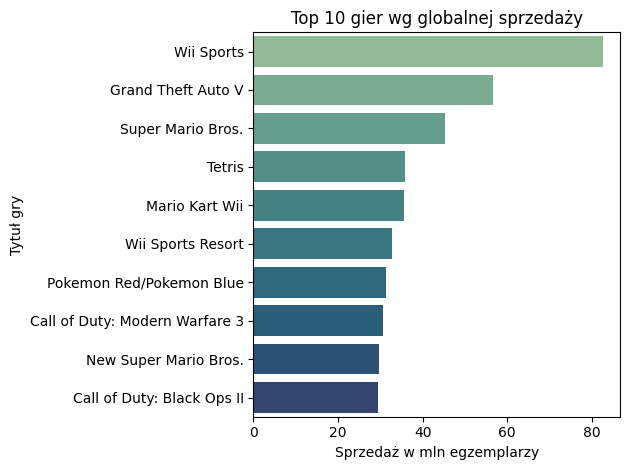

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df2.values, y=df2.index, palette = "crest")
plt.title('Top 10 gier wg globalnej sprzedaży')
plt.xlabel('Sprzedaż w mln egzemplarzy')
plt.ylabel('Tytuł gry')
plt.tight_layout()
plt.show()

In [24]:
df3 = df.groupby(['Genre'])['Global_Sales'].mean().sort_values(ascending=False).reset_index()

In [25]:
print(df3)

           Genre  Global_Sales
0       Platform      0.940615
1        Shooter      0.803881
2   Role-Playing      0.628528
3         Racing      0.590767
4         Sports      0.568495
5       Fighting      0.528829
6         Action      0.519543
7           Misc      0.461514
8     Simulation      0.454251
9         Puzzle      0.422373
10      Strategy      0.256979
11     Adventure      0.180674


In [26]:
premieres_per_year = df.groupby(['Year_of_Release', 'Platform'])['Name'].count().reset_index(name="Premieres")

In [27]:
print(premieres_per_year)

     Year_of_Release Platform  Premieres
0               1980     2600          9
1               1981     2600         46
2               1982     2600         36
3               1983     2600         11
4               1983      NES          6
..               ...      ...        ...
233             2016      PSV         83
234             2016      Wii          1
235             2016     WiiU         14
236             2016     X360         13
237             2016     XOne         87

[238 rows x 3 columns]


In [28]:
premieres_per_year['Rank'] = premieres_per_year.groupby('Year_of_Release')['Premieres'].rank(method = 'dense', ascending = False)

In [29]:
print(premieres_per_year)

     Year_of_Release Platform  Premieres  Rank
0               1980     2600          9   1.0
1               1981     2600         46   1.0
2               1982     2600         36   1.0
3               1983     2600         11   1.0
4               1983      NES          6   2.0
..               ...      ...        ...   ...
233             2016      PSV         83   3.0
234             2016      Wii          1   9.0
235             2016     WiiU         14   7.0
236             2016     X360         13   8.0
237             2016     XOne         87   2.0

[238 rows x 4 columns]


In [30]:
top_per_year = premieres_per_year[premieres_per_year["Rank"] == 1]

In [31]:
print(top_per_year)

     Year_of_Release Platform  Premieres  Rank
0               1980     2600          9   1.0
1               1981     2600         46   1.0
2               1982     2600         36   1.0
3               1983     2600         11   1.0
6               1984      NES         13   1.0
9               1985      NES         11   1.0
12              1986      NES         19   1.0
14              1987      NES         10   1.0
17              1988      NES         11   1.0
20              1989       GB         10   1.0
24              1990      NES          8   1.0
29              1991     SNES         24   1.0
35              1992     SNES         21   1.0
40              1993     SNES         46   1.0
50              1994     SNES         53   1.0
55              1995       PS         99   1.0
64              1996       PS        164   1.0
70              1997       PS        188   1.0
77              1998       PS        248   1.0
84              1999       PS        200   1.0
93           

We see a peak in releases in 2008, which has been declining until 2014, and picking up in 2015 and 2016

In [32]:
pivot_sales_by_genre_platform = pd.pivot_table(data = df, index = "Platform", columns = "Genre", values = "Global_Sales", aggfunc = "sum")
pivot_sales_by_genre_platform['Total'] = pivot_sales_by_genre_platform.sum(axis=1)
pivot_sales_by_genre_platform = pivot_sales_by_genre_platform[pivot_sales_by_genre_platform['Total'] >= 10]
pivot_sales_by_genre_platform = pivot_sales_by_genre_platform.drop(columns='Total')

In [33]:
print(pivot_sales_by_genre_platform)

Genre     Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  \
Platform                                                                  
2600       26.39       0.40      0.77    3.58     13.27   13.65    2.32   
3DS        57.93       4.82     10.57   10.98     32.52    5.55   14.86   
DC          1.26       2.50      1.83     NaN      2.54     NaN    2.65   
DS        111.41      45.76      7.11  135.63     75.89   82.34   38.05   
GB          7.92      17.16       NaN   13.35     53.88   47.47    4.55   
GBA        54.26      12.10      4.21   28.50     78.08   12.09   18.80   
GC         37.25       5.93     18.43   16.45     28.66    4.57   21.79   
GEN         2.74       0.19      5.90    0.03     15.45     NaN    0.26   
N64        29.44       0.45     22.08   11.19     36.13    3.41   40.09   
NES        28.75       4.38      6.54    3.59     95.78   21.00    9.78   
PC         30.88      10.04      0.16    8.42      0.49    0.92    3.74   
PS        125.74      20.

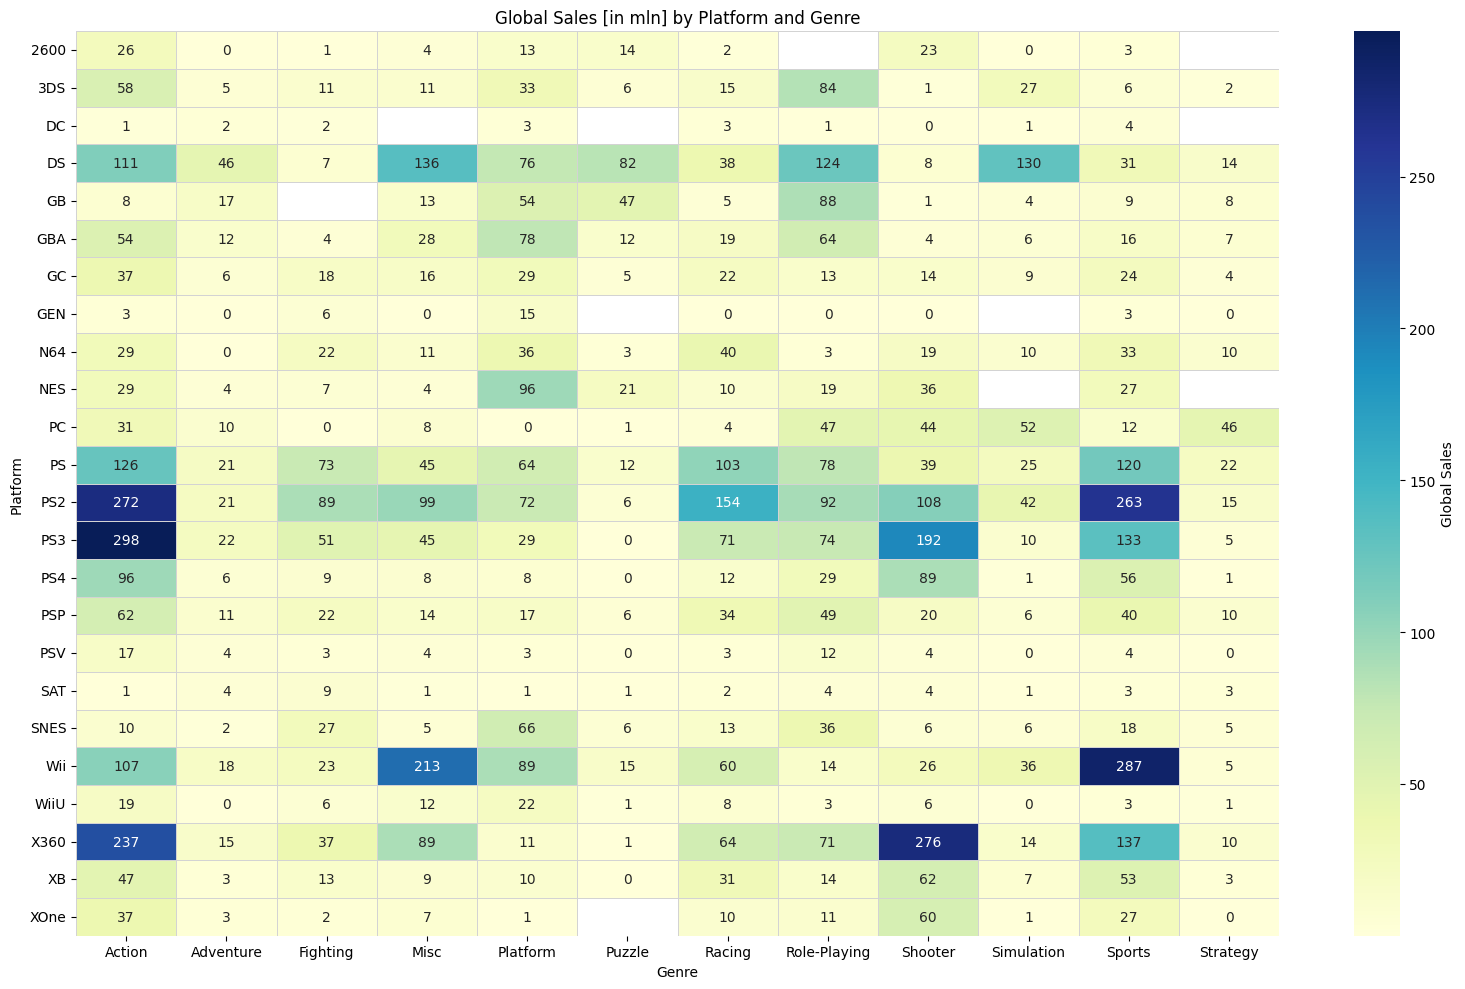

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_sales_by_genre_platform, cmap="YlGnBu", linewidths=0.5, linecolor='lightgrey', cbar_kws={'label': 'Global Sales'}, annot=True, fmt='.0f')

plt.title('Global Sales [in mln] by Platform and Genre')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

Bestsellers are mostly in Action, Shooter and Sports categories, with Playstation, X360 and Wii platforms being the most popular ones

In [35]:
mean_critic_and_user_score = df.groupby("Platform").\
    agg({"Critic_Score":"mean", "User_Score":"mean"}).\
        round({"User_Score":2, "Critic_Score":2}).dropna().reset_index()

In [36]:
mean_critic_and_user_score.sort_values(by='Critic_Score', ascending=False)

,Platform,Critic_Score,User_Score
1,DC,87.36,8.53
5,PC,75.97,7.07
16,XOne,73.33,6.52
9,PS4,72.09,6.75
6,PS,71.59,7.86
11,PSV,70.73,7.33
13,WiiU,70.73,6.90
8,PS3,70.45,6.72
15,XB,69.91,7.53
4,GC,69.60,7.62


Games published by DC platform have best both Critic and User Score, followed by PC and XOne

In [37]:
df4 = df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False).nlargest(10).reset_index()

In [38]:
print(df4)

  Platform  Global_Sales
0      PS2       1233.46
1     X360        961.39
2      PS3        931.14
3      Wii        891.74
4       DS        803.44
5       PS        727.41
6      PS4        314.19
7      GBA        305.62
8      PSP        289.79
9      3DS        257.92


Text(0.5, 0, 'Global Sales [mln]')

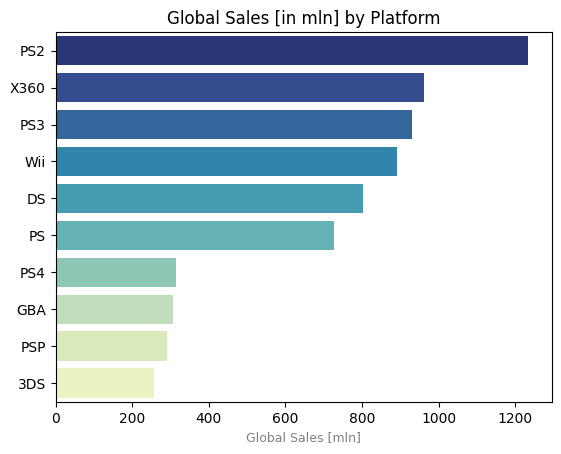

In [39]:
sns.barplot(data=df4, y="Platform", x="Global_Sales", hue="Platform", palette='YlGnBu_r', legend=False).set(title="Global Sales [in mln] by Platform", ylabel='')
plt.xlabel("Global Sales [mln]", fontsize=9, color='gray')

In [40]:
df['Critic_Score_bin'] = pd.cut(df['Critic_Score'], bins=np.arange(10,105,5), right=False)
df['User_Score_bin'] = pd.cut(df['User_Score'], bins = np.arange(1, 10.5,0.5), right=False)

In [41]:
heatmap_pivot = pd.pivot_table(data = df, index = 'Critic_Score_bin', columns = 'User_Score_bin', values = 'Global_Sales', aggfunc = 'sum', observed = True).sort_index(ascending=False)


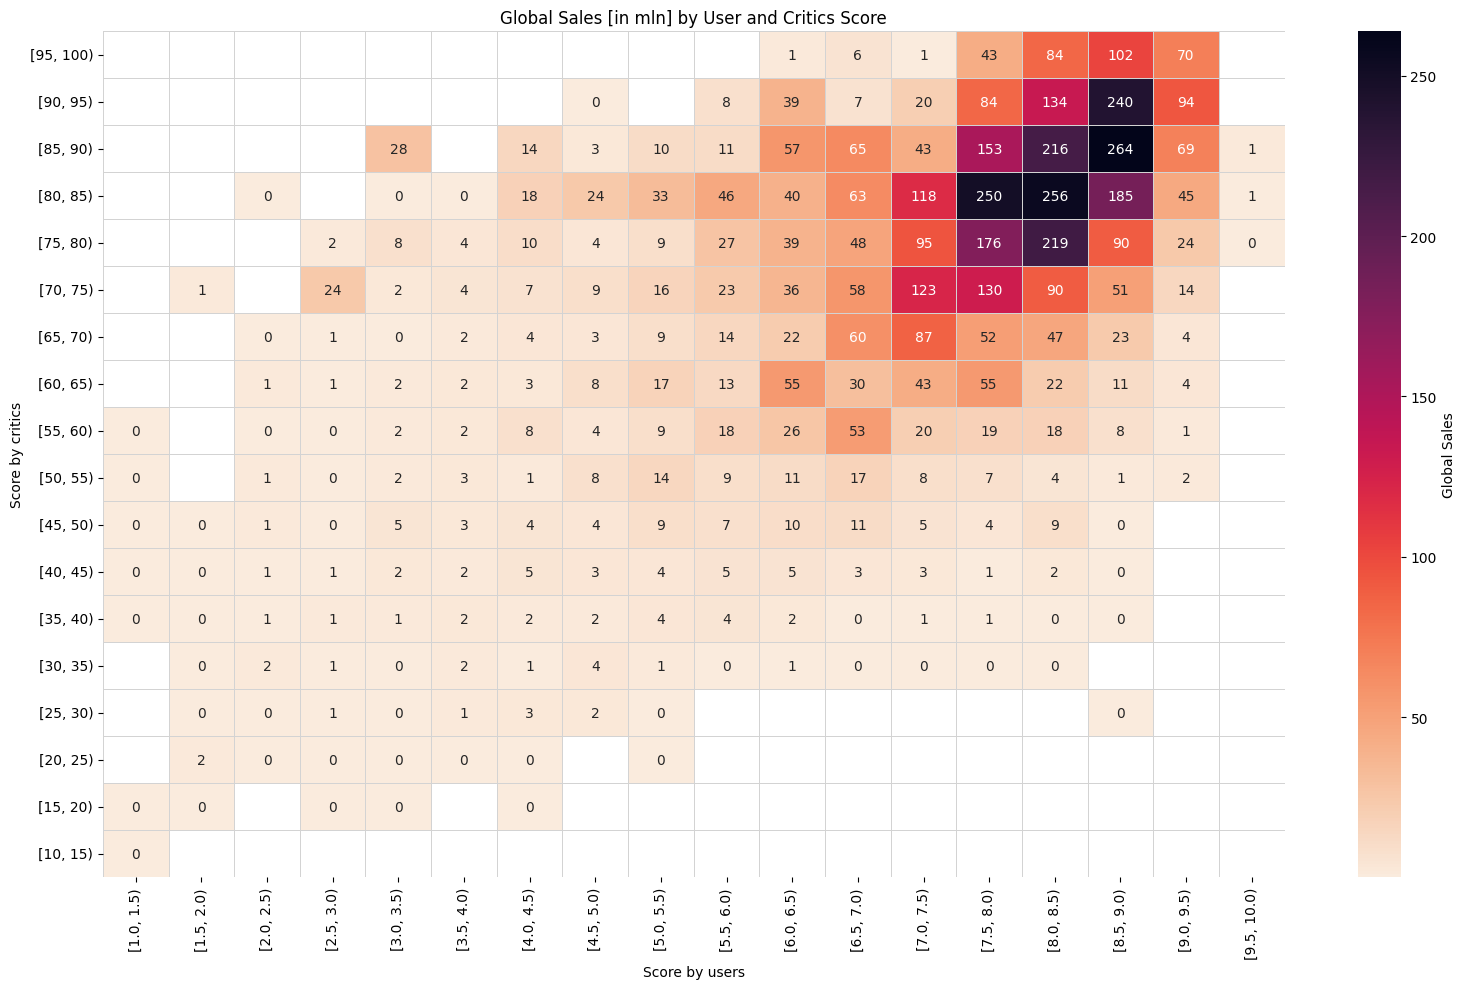

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_pivot, cmap="rocket_r", linewidths=0.5, linecolor='lightgrey', cbar_kws={'label': 'Global Sales'}, annot=True, fmt='.0f')

plt.title('Global Sales [in mln] by User and Critics Score')
plt.xlabel('Score by users')
plt.ylabel('Score by critics')
plt.tight_layout()
plt.show()

In [43]:
print(df[(df['Critic_Score_bin'] == pd.Interval(left=70, right=75, closed='left')) &
         (df['User_Score_bin'] == pd.Interval(left=2.5, right=3.0, closed='left'))])

                                Name Platform  Year_of_Release     Genre  \
60              Call of Duty: Ghosts     X360             2013   Shooter   
69              Call of Duty: Ghosts      PS3             2013   Shooter   
675    Kinect: Disneyland Adventures     X360             2011      Misc   
1828                   Guitar Hero 5      PS2             2009      Misc   
4451      Thrillville: Off the Rails      Wii             2007  Strategy   
7527                     Thrillville      PSP             2006  Strategy   
8534      Thrillville: Off the Rails     X360             2007  Strategy   
9461           Batman: Arkham Knight       PC             2015    Action   
12720               Street Fighter V       PC             2016  Fighting   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
60                                 Activision      6.73      2.56      0.04   
69                                 Activision      4.10      3.63      0.38   
67

In [44]:
print(df[(df['Critic_Score_bin'] == pd.Interval(left=85, right=90, closed='left')) &
         (df['User_Score_bin'] == pd.Interval(left=3.0, right=3.5, closed='left'))])

                              Name Platform  Year_of_Release    Genre  \
29  Call of Duty: Modern Warfare 3     X360             2011  Shooter   
37  Call of Duty: Modern Warfare 3      PS3             2011  Shooter   

     Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
29  Activision      9.04      4.24      0.13         1.32         14.73   
37  Activision      5.54      5.73      0.49         1.57         13.32   

    Critic_Score  Critic_Count  User_Score  User_Count  \
29          88.0            81         3.4        8713   
37          88.0            39         3.2        5234   

                            Developer Rating  Decade Critic_Score_bin  \
29  Infinity Ward, Sledgehammer Games      M    2010         [85, 90)   
37  Infinity Ward, Sledgehammer Games      M    2010         [85, 90)   

   User_Score_bin  
29     [3.0, 3.5)  
37     [3.0, 3.5)  


There is a clear correlation that the better the game is rated, the more sales it generates, with Call of Duty: Ghosts and Call of Duty: Modern Warfare 3 being outliers that generated unusually high sales despite not being rated favorably by users, but acclaimed by Critics.
There is no such occurence in reverse, meaning a game would be a sales hit, rated highly by users despite being bashed by critics

In [45]:
sales_by_year = df.groupby(["Year_of_Release"])["Global_Sales"].sum().reset_index()
sales_by_year


,Year_of_Release,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


Text(0.5, 0, 'Year of Release ')

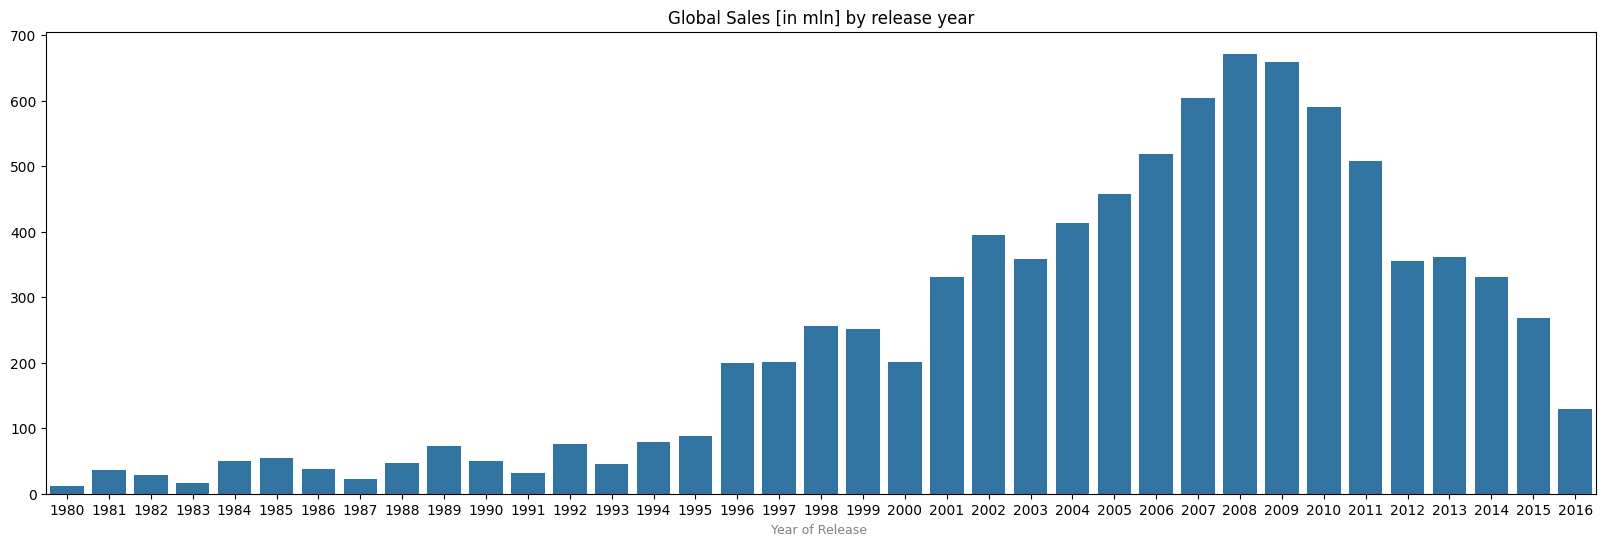

In [46]:
plt.figure(figsize=(20,6))
sns.barplot(data=sales_by_year, y="Global_Sales", x="Year_of_Release").set(title="Global Sales [in mln] by release year", ylabel='')
plt.xlabel("Year of Release ", fontsize=9, color='gray')

In [47]:
df['Rating'].value_counts()

Rating
E       3919
T       2904
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [48]:
#based on ESRB.com, mapping of descriptions is created; K-A (kids to adults) category has been discontinued in 1998 
#and replaced by E category
rating_map = {
    'E': 'Everyone',
    'E10+': 'Everyone 10+',
    'T': 'Teen',
    'M': 'Mature 17+',
    'AO': 'Other',
    'EC': 'Other',
    'K-A': 'Everyone',
    'RP': 'Other'
}

In [49]:
df['Rating_Desc'] = df['Rating'].map(rating_map)

In [50]:
df['Rating_Desc'].value_counts()

Rating_Desc
Everyone        3922
Teen            2904
Mature 17+      1536
Everyone 10+    1393
Other             10
Name: count, dtype: int64

<Axes: xlabel='User_Score', ylabel='Rating_Desc'>

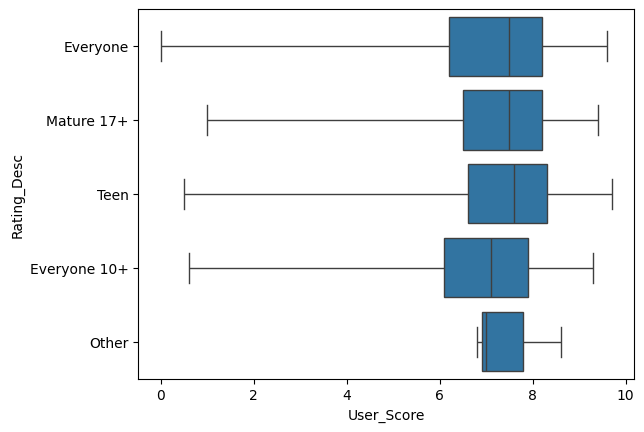

In [51]:
sns.boxplot(data=df, x="User_Score", y="Rating_Desc", whis=(0, 100))

Users tend to rate best Teen games, followed by Mature 17+ and Everyone Categories

In [52]:
df_genre_by_category = df[(df['Rating']=="E")|(df['Rating']=="E10+")]
df_genre = df_genre_by_category.groupby(['Genre'])['Name'].count().sort_values(ascending=False).reset_index().rename(columns={'Name': 'Count'})

In [53]:
df_genre

,Genre,Count
0,Sports,1266
1,Action,878
2,Racing,671
3,Misc,615
4,Platform,495
5,Simulation,367
6,Puzzle,326
7,Adventure,226
8,Role-Playing,194
9,Strategy,144


The most popular Genre released as "Everyone" and "Everyone 10+" category is Sports, with over 1200 games released in total, followed by Action games with 878 releases and Racing with 671 releases

In [54]:
sales_per_rating = df.groupby(['Rating_Desc']).agg({'Global_Sales':'sum', 'Name':'count'}).reset_index()
#premieres_per_year['Rank'] = premieres_per_year.groupby('Platform')['Premieres'].rank(method = 'dense', ascending = False)

In [55]:
sales_per_rating['% of total Sales'] = round(100 * sales_per_rating['Global_Sales'] / sales_per_rating['Global_Sales'].sum(), 2)
sales_per_rating['% of total Games'] = round(100 * sales_per_rating['Name'] / sales_per_rating['Name'].sum(), 2)

In [56]:
sales_per_rating

,Rating_Desc,Global_Sales,Name,% of total Sales,% of total Games
0,Everyone,2412.86,3922,40.25,40.16
1,Everyone 10+,641.20,1393,10.70,14.27
2,Mature 17+,1462.60,1536,24.40,15.73
3,Other,3.76,10,0.06,0.10
4,Teen,1473.97,2904,24.59,29.74


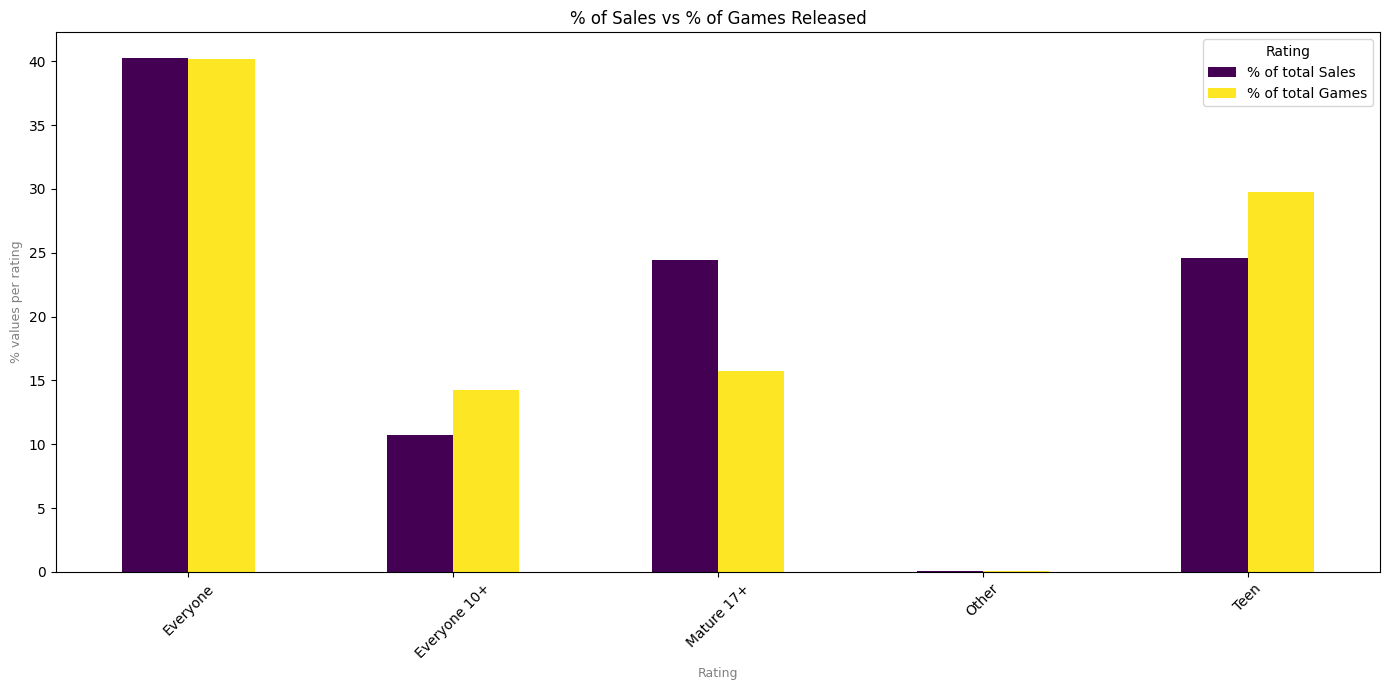

In [57]:
import matplotlib.pyplot as plt

sales_per_rating.set_index('Rating_Desc')[['% of total Sales', '% of total Games']].plot(
    kind='bar', figsize=(14,7), colormap='viridis'
)
plt.ylabel('% values per rating', fontsize=9, color='gray')
plt.xlabel('Rating', fontsize=9, color='gray')
plt.title('% of Sales vs % of Games Released')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

Even though "Mature 17+" category makes ca.16% of all games released, it contributes to over 24% of Global Sales. We see opposite trend for Everyone 10+ and Teen Categories - although they make a bigger chunk of releases, thay do not contribute as much in sales %

In [58]:
sales_by_region = df.groupby(['Genre']).agg({'NA_Sales': 'sum', 'JP_Sales':'sum', 'EU_Sales':'sum'}).reset_index()

In [59]:
print(sales_by_region)

           Genre  NA_Sales  JP_Sales  EU_Sales
0         Action    863.17    160.13    510.99
1      Adventure    101.39     52.22     63.15
2       Fighting    220.51     87.28     99.00
3           Misc    394.01    107.02    208.55
4       Platform    444.44    130.71    199.39
5         Puzzle    121.13     56.68     49.78
6         Racing    356.86     56.63    234.48
7   Role-Playing    330.04    353.39    188.24
8        Shooter    584.83     38.68    314.52
9     Simulation    180.40     63.64    113.17
10        Sports    671.20    134.93    371.32
11      Strategy     67.69     49.30     44.69


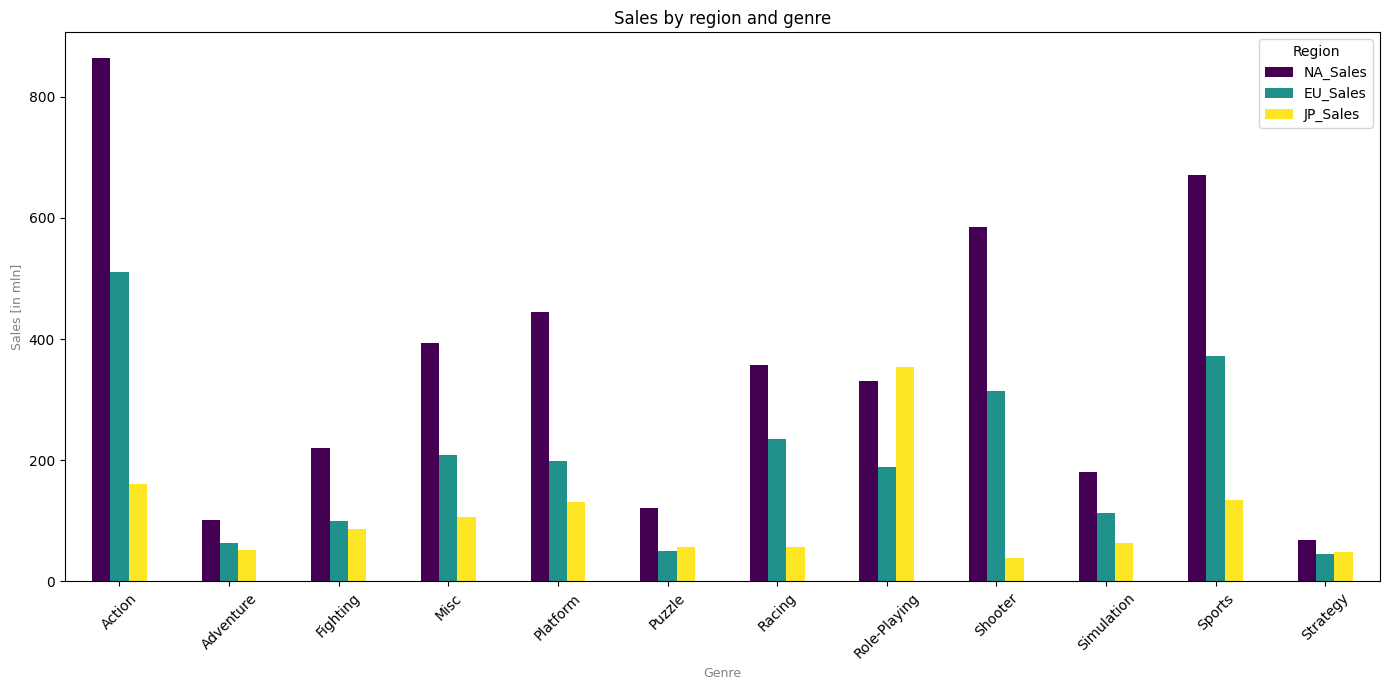

In [60]:
import matplotlib.pyplot as plt

sales_by_region.set_index('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].plot(
    kind='bar', figsize=(14,7), colormap='viridis'
)
plt.ylabel('Sales [in mln]', fontsize=9, color='gray')
plt.xlabel('Genre', fontsize=9, color='gray')
plt.title('Sales by region and genre')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

It's clearly visible that for almost every category sales are biggest in North America region. The only difference is Role-Playing games, which are selling slighly better in Japan than in US. 

In [61]:
publisher_genre_counts = df.groupby(['Publisher', 'Genre'])['Name'].count().reset_index(name='Count')
publisher_total_counts = df.groupby('Publisher')['Name'].count().reset_index(name='Total')

# Połącz dane
publisher_genre_counts = publisher_genre_counts.merge(publisher_total_counts, on='Publisher')
publisher_genre_counts['Percent'] = round(100 * publisher_genre_counts['Count'] / publisher_genre_counts['Total'], 2)

publisher_genre_counts.sort_values(['Publisher', 'Percent'], ascending=[True, False]).head(20)

,Publisher,Genre,Count,Total,Percent
0,10TACLE Studios,Adventure,1,3,33.33
1,10TACLE Studios,Puzzle,1,3,33.33
2,10TACLE Studios,Strategy,1,3,33.33
3,1C Company,Racing,1,3,33.33
4,1C Company,Role-Playing,1,3,33.33
5,1C Company,Strategy,1,3,33.33
6,20th Century Fox Video Games,Action,4,5,80.00
7,20th Century Fox Video Games,Shooter,1,5,20.00
8,2D Boy,Puzzle,1,1,100.00
9,3DO,Action,17,36,47.22


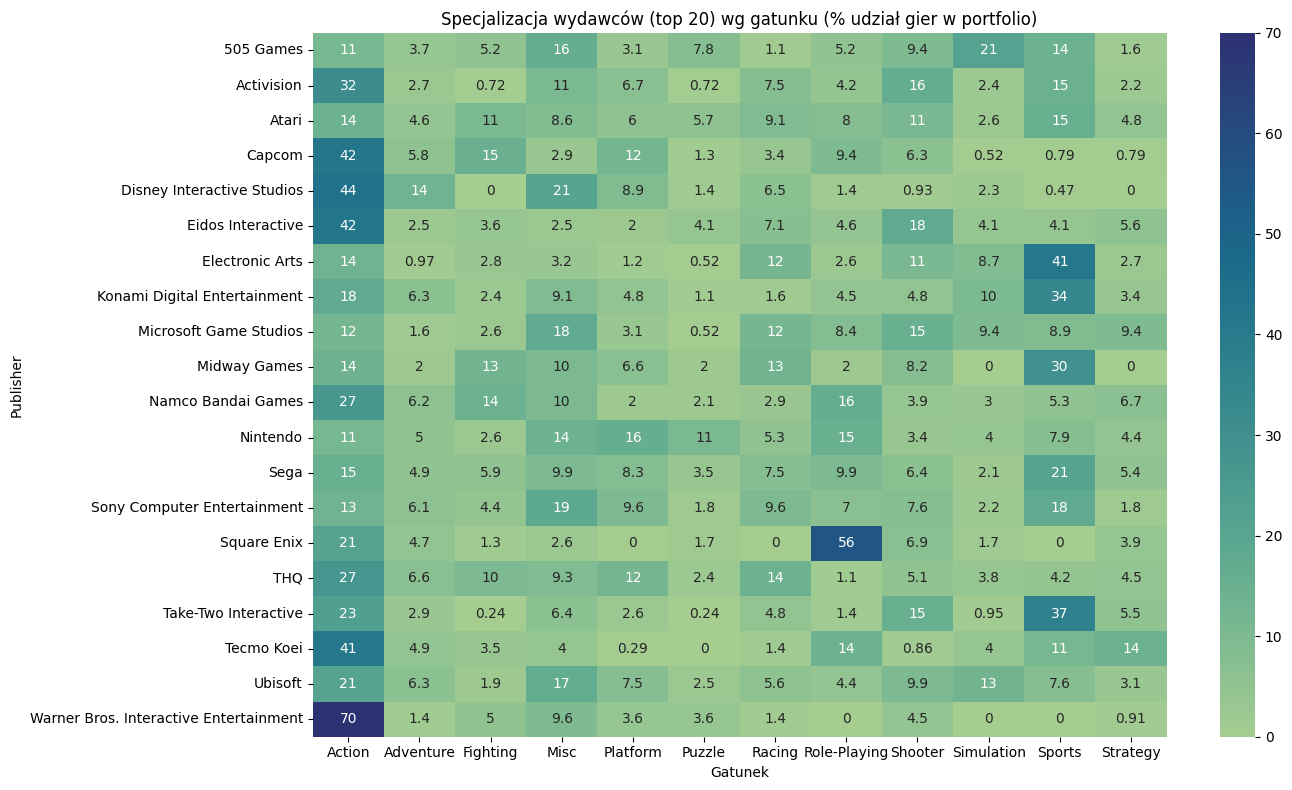

In [64]:
top_publishers = publisher_total_counts.sort_values('Total', ascending=False).head(20)['Publisher']

# Filtrowanie danych tylko dla wybranych wydawców
pivot_top = publisher_genre_counts[publisher_genre_counts['Publisher'].isin(top_publishers)]
pivot_top = pivot_top.pivot(index='Publisher', columns='Genre', values='Percent').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_top, cmap="crest", annot=True)
plt.title("Specjalizacja wydawców (top 20) wg gatunku (% udział gier w portfolio)")
plt.xlabel("Gatunek")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

While it's visible that many Publishers just want to scoop as much of a market with Action Genre, which is by far the most popular, Square Enix seems to specialise in Role-Playing Games, while EA, KOnami and Take-Two interactive focus more on Sports